# LABORATORIUM 2
## Rozwiązywanie układów liniowych

Laboratorium to zostało ocenione na 4.5/5 (mimo tego że ostatnie zadanie nie działało xD)

Tip: zawsze warto pokazać prace, bo 

In [2]:
#imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import random
import time
from copy import deepcopy

### Zadanie 1 Metoda Gaussa-Jordana

Złożoność czasowa implementacji: O($n^3$)

In [6]:
def gauss_jordan(A): #nxn+1 macierz
  n = len(A)
  for i in range(n):

    #szukanie największego i swap
    biggest_index = i
    for j in range(i,n):
      if abs(A[j][i]) > abs(A[biggest_index][i]):
        biggest_index = j
    A[i],A[biggest_index] = A[biggest_index],A[i]

    #odejmowanie
    for row in range(i+1,n):
      mult = A[row][i]/A[i][i]
      for col in range(i,n+1):
        A[row][col] -= A[i][col]*mult
  

  #normalizacja
  for row in range(n):
    div = A[row][row]
    for col in range(n+1):
      A[row][col] /= div

  #solve
  result = [1 for _ in range(n + 1)]
  for j in range(n - 1, -1, -1):
    for i in range(n + 1):
      A[j][i] = A[j][i] * result[i]
    sum = 0
    for i in range(n):
      sum += A[j][i]
    A[j][n] -= sum - 1
    result[j] = A[j][n]

  return result

A następnie testując tę implementację:

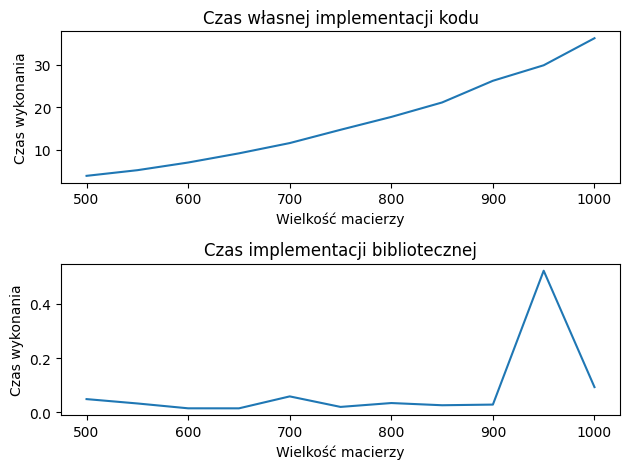

In [8]:
def randomMatrix(N):
  A = [[random.random() for _ in range(N+1)] for _ in range(N)]

  A_solve = [[A[i][j] for j in range(len(A))] for i in range(len(A))]
  B_solve = [A[i][len(A)] for i in range(len(A))]
  return A, A_solve, B_solve

#code for testing compared to numpy
x_axis = []
time1 = []
time2 = []
for N in range(500,1001,50):
  A, A_solve, B_solve = randomMatrix(N)
  x_axis.append(N)
  start = time.time()
  gauss_jordan(A)
  end = time.time()
  time1.append(end-start)
  start = time.time()
  np.linalg.solve(A_solve,B_solve)
  end = time.time()
  time2.append(end-start)

fig, axs = plt.subplots(2)

axs[0].plot(x_axis, time1)
axs[0].set_title('Czas własnej implementacji kodu')
axs[0].set_xlabel('Wielkość macierzy')
axs[0].set_ylabel('Czas wykonania')


axs[1].plot(x_axis, time2)
axs[1].set_title('Czas implementacji bibliotecznej')
axs[1].set_xlabel('Wielkość macierzy')
axs[1].set_ylabel('Czas wykonania')

plt.tight_layout()

plt.show()
#lokalny czas: +-3minuty

Jak widać mój kod jest zdecydowanie wolniejszy (ale poprawny :) ) co może być związane z wieloma optymalizacjami wynonanymi w kodzie bibliotecznym.
    Wnioskuje to po nieregularnym czasie wykonania dla metody bibliotecznej

### Zadanie 2. Faktoryzacja LU

koncept faktoryzacji **A** = **LU** jest bardzo prosty. Podczas tworzenia macierzy trójkątnej górnej (**U**) współczynniki użyte do mnożenia stawiamy na przeciw do macierzy dolnej (**L**), dzięki czemu po pomnożeniu **L** * **U** otrzymujemy macierz **A** z niedokładnościami, które zakwalifikowałem jako wywołane arytmetyką zmiennoprzecinkową

In [15]:
def LU(A): #nxn macierz
  n = len(A)
  for i in range(n):

    #faktoryzacja
    for j in range(n):
      for i in range(j+1, n):
        mult = A[i][j]/A[j][j]
        for k in range(j,n):
          A[i][k] -= A[j][k]*mult
        A[i][j] = mult

Testując...

In [16]:
def randomMatrix2(N):
  A = [[random.random() + 1e-10 for _ in range(N)] for _ in range(N)]
  return A


A = randomMatrix2(5)
print(*A, sep="\n")
LU(A)
print("\n")
print(*A, sep="\n")

U = [[A[i][j] if i <= j else 0 for j in range(len(A))] for i in range(len(A))]
print("\nU:")
print(*U, sep="\n")

L = [[A[i][j] if i > j else 1 if i == j else 0 for j in range(len(A))] for i in range(len(A))]

print("\nL:")
print(*L, sep="\n")

A_2 = np.dot(L,U)
print("\nA_2:")
print(*A_2, sep="\n")

[0.15049245531535038, 0.9964179364018749, 0.6956044731403196, 0.7883701571820333, 0.7518653002810074]
[0.31971468130171143, 0.44137158353810646, 0.1365403161804286, 0.35459648224722184, 0.016688655039523874]
[0.2544389623429433, 0.8174958107815475, 0.46242892616419495, 0.550373572051982, 0.29287660627982093]
[0.02126786667939739, 0.2220182731852629, 0.5074466585929294, 0.17680570595403178, 0.3777425676597861]
[0.6036284541905592, 0.4184870521250712, 0.11093965198152876, 0.24613987530261972, 0.43149045383924123]


[0.15049245531535038, 0.9964179364018749, 0.6956044731403196, 0.7883701571820333, 0.7518653002810074]
[4141.798249823452, -4857.247675982103, -3391.04110429074, -3843.069872370539, -3665.441048495374]
[3296.1728395713085, 0.6760392019430355, -1.3331178561488741, -2.128664535862299, -1.226065723657939]
[275.51819838726664, 0.05650829370135645, -82.25891813932911, -81.15237092454642, -47.08195721707958]
[7819.807538806045, 1.6038286539187645, -49.14069861481757, 1.29094599020816

Dodatkowo, przeprowadziłem testy dla macierzy między *10x10* a *1000x1000*.
    Zastosowałem maksymalną różnice jako wyznacznik dokładności

In [17]:
def LU_Check(N):
    A = randomMatrix2(N)
    TMP = deepcopy(A)
    LU(TMP)
    U = [[TMP[i][j] if i <= j else 0 for j in range(N)] for i in range(N)] #one linery jej!
    L = [[TMP[i][j] if i > j else 1 if i == j else 0 for j in range(N)] for i in range(N)]
    A_2 = np.dot(L,U)

    max_diff = 0

    for i in range(N):
        for j in range(N):
            max_diff = max(max_diff,abs(A[i][j]-A_2[i][j]))

    return max_diff

x_axis = []
results = []
for N in range(10,1001,30):
    x_axis.append(N)
    results.append(LU_Check(N))

plt.plot(x_axis,results)
plt.xlabel("N")
plt.ylabel("Maksymalna różnica")
plt.tight_layout()
plt.show()
#czas lokalnego wykonania: +- 4.5 minuty

ZeroDivisionError: float division by zero

## Zadanie 3. Analiza obwodu elektrycznego

### Krok 1. Preparacja danych

Początkowo należy zczytać z pliku lub wygenerować informacje o podpięciu siły elektromotorycznej i krawędzie losowego grafu (do czego użyłem biblioteki networkX) poczym przekonwertowac je na graf. Wybrałem reprezentacje macierzową ze względu na dostepnośc poszczególnych krawędzi

In [76]:
def readEdges(flag:str,size:int,file_name:str, maxResistance:int=0,electromotoriveForce:int=0): #czytanie pliku
    #from file - flag: "f"
    if flag == "f":
        if file_name is None:
            raise Exception("Nie podano pliku")
        edges = []
        with open(file_name, 'r') as file:
            for line in file:
                v_a, v_b, weight = map(int, line.strip().split())
                edges.append((v_a-1, v_b-1, weight))
        additional = edges.pop()
        return edges, additional
    #random graph 
    #basic checks if graf could be made:
    if size <= 0 or maxResistance <= 0 or electromotoriveForce <= 0:
        raise Exception("Integer inputs must be positive for random graph")
    #additional
    additional = [random.randint(0,size//2),random.randint(size//2,size-1),electromotoriveForce]
    #erdos_renyi - flag: "e"
    if flag == "e":
        G = nx.erdos_renyi_graph(size,0.5,directed=False)
        return nxGraphToEdges(G,maxResistance), additional
    #kubiczny - flag: "k"
    elif flag == "k":
        G = nx.cubical_graph(directed=False)
        return nxGraphToEdges(G,maxResistance),additional
    #most - flag: "m"
    elif flag == "m":
        #2 graphs size//2
        G = nx.erdos_renyi_graph(size//2,0.5,directed=False)
        G2 = nx.erdos_renyi_graph(1+(size//2),0.5,directed=False)
        Edges1 = nxGraphToEdges(G,maxResistance)
        Edges2 = nxGraphToEdges(G2,maxResistance)
        #increase second graph edges
        for i in range(len(Edges2)):
            s, t, w = Edges2.pop(0)
            Edges2.append((s+size//2,t+size//2,w))

        #connect them
        Edges = Edges1 + Edges2
        #add bridge
        Edges.append((random.randint(0,size//2),random.randint(1+(size//2),size),random.randint(0,maxResistance)))
        return Edges,additional
    #siatka 2D - flag: "s"
    elif flag == "s":
        edges = []
        size = int(np.floor(np.sqrt(size)))
        for i in range(size**2 - size):
            if i % size != size-1:
                edges.append((i,i+1,random.randint(0,maxResistance)))
            edges.append((i,i+size,random.randint(0,maxResistance)))
        additional = [random.randint(0,size//2),random.randint(size//2,size-1),electromotoriveForce]

        for i in range(size**2-size,size**2-1):
            edges.append((i,i+1,random.randint(0,maxResistance)))
        return edges,additional
    #small-world - flag: "sw"
    elif flag == "sw":
        G = nx.watts_strogatz_graph(size, 10,0.5)
        return nxGraphToEdges(G,maxResistance), additional

    else:
        raise Exception("kurwo bita")

    

def nxGraphToEdges(G:nx.graph,maxResistance:int):
    TMP = G.edges()
    #random asigment
    edges = []
    for s,t in TMP:
        edges.append((s,t,random.randint(1,maxResistance)))
    return edges

def findLen(edges):
    ma = 0
    for u, v, _ in edges:
        if ma < u:
            ma = u
        if ma < v:
            ma = v
    return ma + 1 #len -> biggest node + 1

def convertToMatrix(V, Edges):
    G = [[0 for _ in range(V)] for _ in range(V)]
    for (u, v, weight) in Edges:
        G[u][v] = weight
        G[v][u] = weight
    return G

def NumberEdges(V,Edges):
    i = 0
    NumberedEdges = [[0 for _ in range(V)] for _ in range(V)]
    for s,t, _ in Edges:
        NumberedEdges[s][t] = i
        NumberedEdges[t][s] = i
        i += 1
    return NumberedEdges


### Krok 2. Znajdowanie Cyklów

Cykle są nam potrzebne w celu znalezienia oczek z drugiego prawa Kirhoffa, które uzupełnią nasz układ równań. Jedno z oczek jest specialne, jest to ścieżka między zaczepami baterii do której przykładamy naszą siłe elektromotoryczną (do tego użyjemy algorytmu znajdowania ścieżki)

Główny algorytm który został tu użyty jest to **przeszukiwanie wgłąb** z warunkiem końcowym który zatrzymuje prace algorytmu kiedy napotkamy element startowy

In [72]:
def findCycleFromEdge(G, s, t):
    G[s][t] = 0
    V = len(G)
    Q = deque()
    Q.append(s)
    parent = [None for _ in range(V)]
    visited = [False for _ in range(V)]
    visited[s] = True

    #dfs on matrix
    while Q:
        currentVertex = Q.pop()
        for neighbour in range(V):
            #end condition
            if G[currentVertex][neighbour] > 0 and neighbour == t:
                parent[t] = currentVertex
                parent[s] = t
                return parent
            #further dfs
            if G[currentVertex][neighbour] > 0 and not visited[neighbour]:
                Q.append(neighbour)
                visited[neighbour] = True
                parent[neighbour] = currentVertex
    return None

def CreateCycle(Parent,start,end):
    Cycle = [end]
    while end != start:
        end = Parent[end]
        Cycle.append(end)
    return Cycle

def findCycles(G, edges, n):
    cycleCounter = 0
    Cycles = []
    for s, t, _ in edges:
        result = findCycleFromEdge(G, s, t)
        if result is not None:
            cycleCounter += 1
            cycle = CreateCycle(result,s,t)
            Cycles.append(cycle)
            G[s][t] = 0
        if cycleCounter == n:
            return Cycles
    return None

def findAnyPathFromGraph(graph, startingVertex, endingVertex):
    def dfs(graph, startingVertex):
        V = len(graph)
        Q = deque()
        Q.append(startingVertex)
        parent = [None] * V
        visited = [False] * V
        visited[startingVertex] = True

        while Q:
            currentVertex = Q.pop()
            for neighbourVertex in range(V):
                if not None and graph[currentVertex][neighbourVertex] > 0 and not visited[neighbourVertex]:
                    Q.append(neighbourVertex)
                    visited[neighbourVertex] = True
                    parent[neighbourVertex] = currentVertex
        return parent

    parent = dfs(graph, startingVertex)
    path = []

    vertex = endingVertex
    while parent[vertex] != None:
        path.append(vertex)
        vertex = parent[vertex]
    path.append(startingVertex)
    path.reverse()
    return path

### Krok 3. Rozwiązywanie układu równań i prezentacja wyników

W ostatnim kroku wykonujemy wszystkie wcześniej wymienione procesy w celu uzyskania danych i cyklów. Następnie tworzymy macierz ExE, którą uzupełniamy wieszchołkami z pierwszego prawa kirchhoffa a następnie cyklami z drugiego (nasz specialny cykl zawierający baterrie został wstawiony w 1sze pole żebyśmy zawsze wiedzieli gdzie wstawić siłe elektromotoryczną).

Następnie rozwiązujemy uzywając bibliotecznego solvera i przedstawiamy wagi kolorując krawędzie grafu

9
Wyliczone wagi:
[0.47076923 0.96923077 0.07912088 0.225      0.20769231 1.10769231
 0.24230769 0.23076923 1.10769231 0.41538462 0.32307692 0.31648352
 0.62307692 0.3        0.13846154 0.36346154 0.78461538]


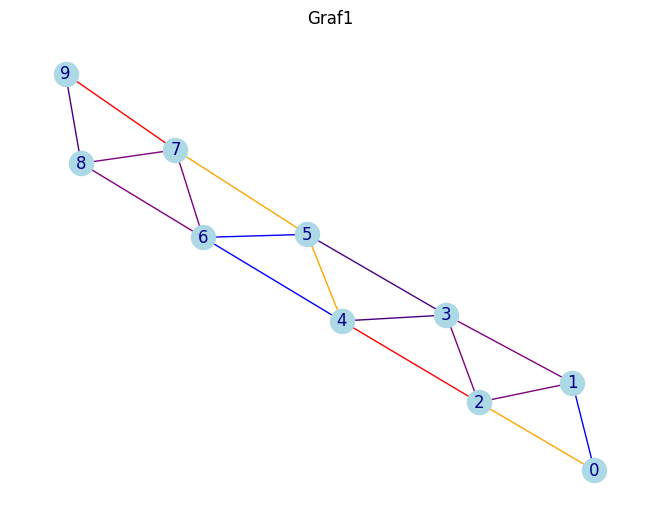

7
Wyliczone wagi:
[0.16666667 0.20833333 0.27777778 0.41666667 0.83333333 0.10416667
 0.11904762 0.12152778 0.14583333 0.18229167 0.24305556 0.36458333
 0.72916667 0.10416667 0.09114583]


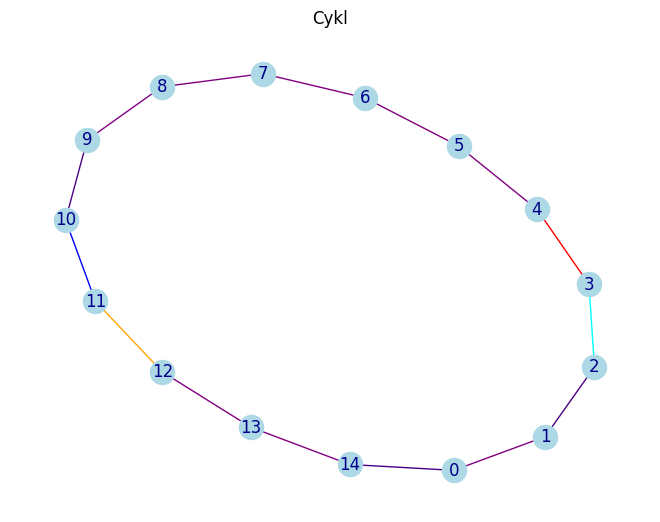

19
Wyliczone wagi:
[1.65405405 3.40540541 0.27799228 0.79054054 0.72972973 3.89189189
 0.85135135 0.81081081 3.89189189 1.45945946 1.13513514 1.11196911
 2.18918919 1.05405405 0.48648649 1.27702703 2.75675676 1.84864865
 1.65405405 3.40540541 0.27799228 0.79054054 0.72972973 3.89189189
 0.85135135 0.81081081 3.89189189 1.45945946 1.13513514 1.11196911
 2.18918919 1.05405405 0.48648649 1.27702703 2.75675676]


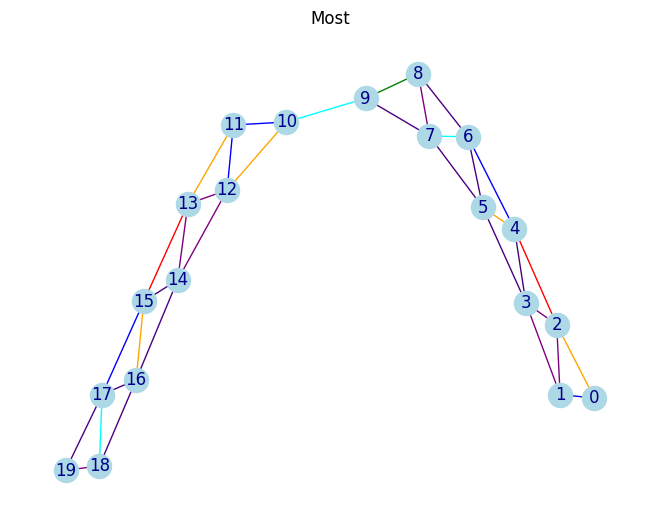

19
Wyliczone wagi:
[ 1.93625667  0.38853233  0.20660347  0.27476697  0.03635397  0.85892181
  0.11005392  0.1985811   1.5851482   0.02808224  3.39280154 11.82414346
  1.33700295  1.33123108  1.90159581  3.09697937  1.8865984   1.48027474
  0.05104043  1.37493776  0.0474697   0.28675931  0.18355394  1.17852488
  0.04495278  0.17097538  0.96758977  1.3296866   0.10205674  0.32955
  0.02514709  0.08901418  0.09125434  5.90562692  0.18565568  0.30768249
  0.91557392  1.15226182  0.1082703   0.04564898  0.27109799  0.12032391
  1.23298407  0.06612005  0.59677018  1.19058956  0.11362623  0.39187592
  0.30396808  0.03244108  0.12486855  0.09138769  0.36198978  0.13618332
  0.47565885  0.27073347  0.33929199  5.41130192  1.545886    0.15693628
  0.2370162   0.15356059  0.19693496  0.24879505  0.46298324  0.01961959
  0.20606899  0.1192545   2.00207176  0.26350974  0.10809588  0.38634028
  0.12916905  2.52301175  3.67241678  0.26601819  0.36887095  0.54248624
  0.61255453  0.61080423  0.4616266

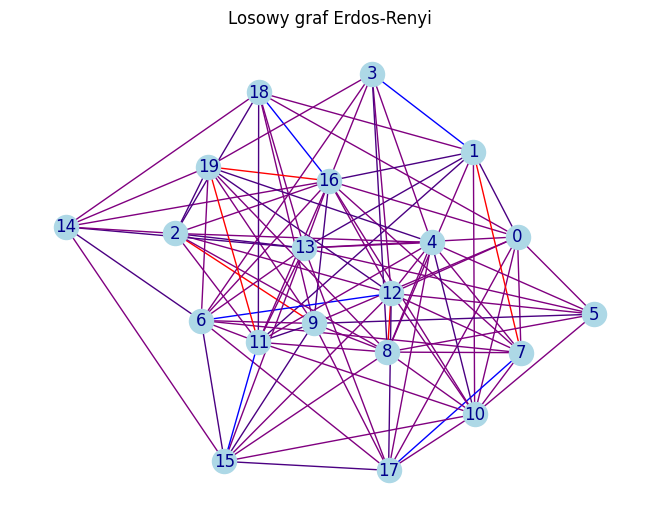

[(0, 1, 6), (0, 2, 5), (0, 4, 3), (0, 8, 14), (0, 9, 9), (1, 4, 5), (1, 5, 8), (1, 6, 20), (1, 9, 14), (2, 4, 11), (2, 5, 15), (2, 7, 11), (2, 8, 3), (2, 9, 15), (3, 7, 19), (4, 5, 7), (4, 6, 1), (4, 7, 7), (4, 8, 12), (4, 9, 19), (5, 6, 6), (5, 8, 6), (5, 9, 4), (6, 7, 6), (6, 8, 17), (6, 9, 6), (8, 9, 9), (10, 11, 10), (10, 13, 14), (10, 16, 7), (10, 18, 11), (10, 19, 17), (11, 12, 16), (11, 13, 20), (11, 14, 14), (11, 15, 6), (11, 16, 15), (11, 17, 2), (11, 18, 17), (11, 19, 5), (12, 17, 7), (12, 18, 1), (12, 20, 3), (13, 14, 4), (13, 15, 13), (13, 16, 2), (13, 18, 18), (13, 19, 13), (14, 16, 7), (14, 17, 13), (14, 18, 17), (14, 19, 4), (14, 20, 14), (15, 18, 20), (15, 19, 20), (16, 18, 13), (16, 20, 13), (17, 20, 2), (18, 20, 18), (19, 20, 14), (0, 14, 18)]
[4, 16, 20]
16
Wyliczone wagi:
[3.35168702e-01 4.09452599e-01 1.11732970e+00 1.44075286e-01
 2.24033198e-01 2.68195379e-01 3.66661570e-02 1.85709743e-02
 3.77612327e-04 1.18611465e-01 1.71385648e-02 4.96937823e-02
 1.00696621e-0

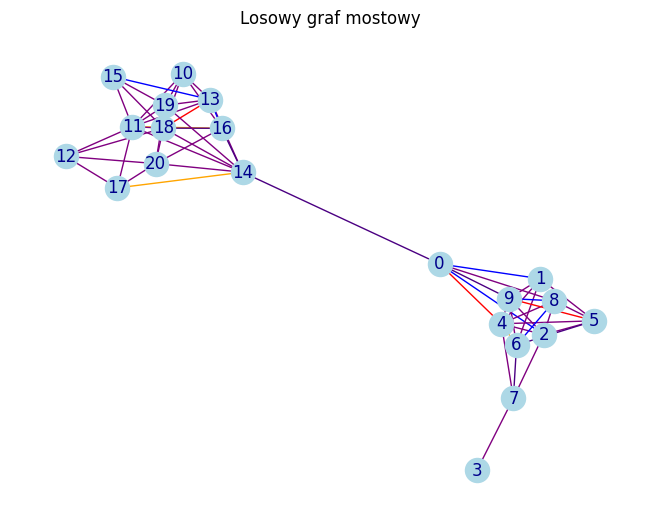

2
Wyliczone wagi:
[7.33333333 1.04761905 1.38888889 0.37681159 0.26190476 0.57777778
 0.16479401 0.06504065 0.15555556 0.51977401 0.09824561 0.41025641
 0.26666667 1.86666667 2.66666667 0.08333333 0.12631579 0.06060606
 0.17204301 0.1025641  0.04938272 0.04395604 0.19047619 0.57142857]


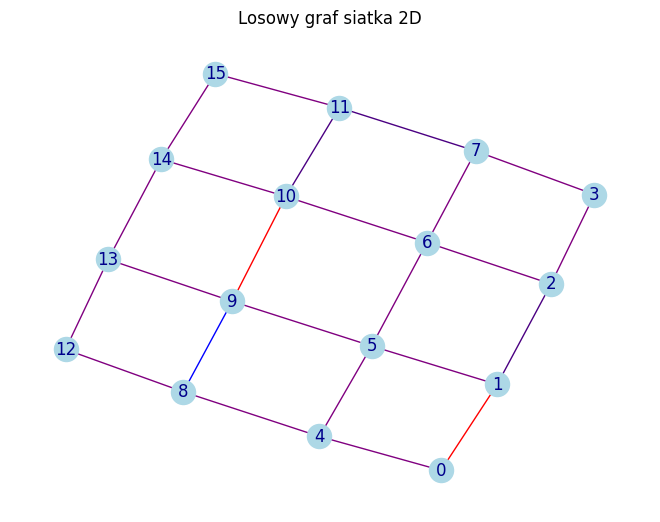

19
Wyliczone wagi:
[2.70026847e+00 1.17352433e+01 5.70526868e-01 4.68930504e-01
 3.77708008e+00 1.11057027e+00 5.57569279e-02 5.11428783e-01
 4.74502243e-01 1.91164463e+00 7.31507114e-02 9.87842729e-02
 4.30643298e-01 1.57406854e-01 9.26914022e-01 5.61826676e-01
 2.08927063e-01 5.36039093e-01 4.39715309e+02 1.60512491e+00
 1.22972529e-01 2.68896107e+00 1.18857743e+00 3.02226076e-01
 4.54985746e+00 7.56944015e-01 7.94931205e-01 4.23909601e-01
 2.33091850e+00 1.78934206e-01 2.03687699e+00 1.90497951e+00
 5.27939299e-01 2.34566289e-01 4.47136277e+00 1.34663024e-01
 3.09275422e+00 3.03739664e-01 1.64893476e+01 3.96130964e+00
 7.74051552e-01 6.86929148e-01 5.58210432e+00 4.92143831e+00
 3.00945590e+00 3.76988560e+00 9.83525701e-01 3.28857474e+00
 9.54280069e-01 1.68860592e+00 8.78177816e-01 1.30616982e+00
 6.29440783e-01 7.84042079e-01 1.53338112e-01 4.02000026e-02
 5.55174704e-02 5.00957526e-01 5.63646740e-02 6.28894147e-01
 4.06009851e-01 2.76231350e+00 9.63099425e-02 2.65426124e-01
 2.95

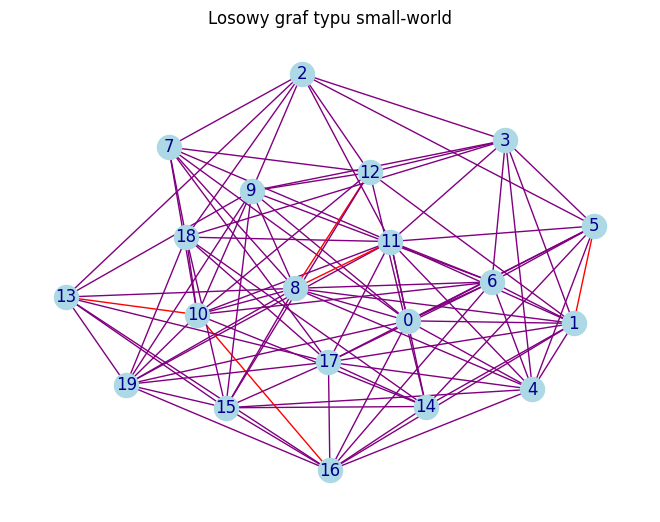

In [84]:
def SolveKirhoff(flag:str,size:int=0,file_name:str=None,LabelName:str=None, maxResistance:int=0,electromotoriveForce:int=0):
    Edges, additional = readEdges(flag,size,file_name,maxResistance,electromotoriveForce)
    E = len(Edges)
    V = findLen(Edges)
    graph = convertToMatrix(V, Edges)
    NumberedEdges = NumberEdges(V,Edges)
    M = [[0 for _ in range(E)] for _ in range(E)]




    k = 0 #row index

    #first law
    for j in range(V):
        if j != additional[0] and j != additional[1]:
            k += 1
            for i in range(V):
                if graph[j][i] != 0:
                    if j < i:
                        M[k][NumberedEdges[j][i]] = -graph[j][i]
                    if j > i:
                        M[k][NumberedEdges[j][i]] = graph[j][i]
        else:
            continue

    #second law
    var = findAnyPathFromGraph(graph, additional[0], additional[1])
    cycles = findCycles(graph, Edges, E-V+1)
    cycles.append(var)

    for j in range(len(cycles)):
        cycle = cycles[j]
        for i in range(len(cycle)):
            num = NumberedEdges[cycle[i]][cycle[i - 1]]
            if j != len(cycles) - 1:
                if cycle[i] < cycle[i - 1]:
                    M[k + j + 1][num] = -Edges[num][2]
                else:
                    M[k + j + 1][num] = Edges[num][2]
            elif j == len(cycles) - 1:
                if cycle[i] < cycle[i - 1]:
                    M[0][num] = -Edges[num][2]
                else:
                    M[0][num] = Edges[num][2]


    B = [0 for i in range(E)]
    
    B[0] = additional[2]

    weights = np.linalg.solve(M, B)
    weights = abs(weights)
    mi = min(weights)
    ma = max(weights)
    print("Wyliczone wagi:")
    print(weights)

    if abs(mi) < abs(ma):
        abMi = abs(mi)
        abMa = abs(ma)
    else:
        abMi = abs(ma)
        abMa = abs(mi)

    colors = ["purple", "indigo", "blue", "cyan", "green", "yellow", "orange", "red"]
    col = []
    for weight in weights:
        index = int((abs(weight) - abMi) / (abMa - abMi) * (len(colors) - 1))
        col.append(index)



    G = nx.Graph()
    Ed = []
    for u, v, _ in Edges:
        Ed.append((u, v))

    G.add_edges_from(Ed)

    node_colors = {}
    for i, node in enumerate(G.nodes()):
        node_colors[node] = colors[col[i]]

    pos = nx.spring_layout(G, seed=4) #looks readable

    nx.draw(G, pos=pos, with_labels=True, arrows=True, node_color='lightblue', edge_color=list(node_colors.values()), node_size=300,
            font_size=12, font_color='darkblue')

    plt.title(LabelName)
    plt.show()

SolveKirhoff("f",file_name="graf.txt",LabelName="Graf1")
SolveKirhoff("f",file_name="graf2.txt",LabelName="Cykl")
SolveKirhoff("f",file_name="graf3.txt",LabelName="Most")
SolveKirhoff("e",size=20,LabelName="Losowy graf Erdos-Renyi",maxResistance=10,electromotoriveForce=37)
SolveKirhoff("m",size=20,LabelName="Losowy graf mostowy",maxResistance=20,electromotoriveForce=20)
SolveKirhoff("s",size=20,LabelName="Losowy graf siatka 2D",maxResistance=100,electromotoriveForce=100)
SolveKirhoff("sw",size=20,LabelName="Losowy graf typu small-world",maxResistance=210,electromotoriveForce=1000)

Zaprezentowałem 3 przykładowe grafy, i losowo generowany przykład dla każdego z wymienionych w konspekcie grafów

### Komentarz do rozwiązania
nadokreślony układ równań rozwiązałem usuwając krawędzie, co zagwarantuje, że nie będziemy cały czas tych samych oczek używać.

*dod. informacja: przez nature biblioteki grafowej, czasem zdarza się, że losowo wygenerowany graf powstaje rozspójniony, ale wg moich testów zdarza się to czasem tylko*